# Heritability estimate on subtype from gambling activation maps

##### Subtype:
- Niak preprocessed GAMBLING task (new scrub method)
- 5 subtype
- **FD_scrubbed_mean regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed_mean" "Age_in_Yrs" "Gender" as covariate


## Build Pheno file

### Merge behavioral variables with subtypes weights

In [259]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display
import time

In [260]:
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [261]:
task_name = 'gambling'

In [262]:
# Set up the paths 
path_root = "/home/yassinebha/Drive/HCP/"
net_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_GAMBLING_19-Jun-2017/networks/")
out_path = os.path.join(path_root,"Solar_heritability/HCP_subtype/")

In [263]:
# Set up files name
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_{}_raw.csv".format(task_name))
solar_script = 'fcd_solar_h2r_test.sh'
pheno_save = 'solar_{}_spm_pheno.csv'.format(task_name)
pedig_save = 'solar_{}_spm_pedigre.csv'.format(task_name)
solar_out = 'subtype_5_{}_{}'.format(task_name,time.strftime("%d-%m-%Y"))
h2r_out_file = 'h2r_solar_{}_spm_{}.csv'
## Solar covariates
solar_cov = '    cov FD_scrubbed_mean Gender'

In [264]:
# List of network names
list_trial = os.listdir(net_path)
list_trial

['contrast_loss_event_vs_neut_event',
 'contrast_win_vs_loss',
 'contrast_win_event_vs_neut_event',
 'neut_event',
 'contrast_win_event_vs_loss_event',
 'loss',
 'loss_event',
 'win',
 'win_event']

In [265]:
# Loop over each network and build weight file
for index, trial_name in enumerate(list_trial):
    file_path = os.path.join(net_path, trial_name, sbt_name_pattern.format(trial_name))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}".format(trial_name, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [266]:
dataframe.head()

,Subject,contrast_loss_event_vs_neut_event_sub1,contrast_loss_event_vs_neut_event_sub2,contrast_loss_event_vs_neut_event_sub3,contrast_loss_event_vs_neut_event_sub4,contrast_loss_event_vs_neut_event_sub5,contrast_win_vs_loss_sub1,contrast_win_vs_loss_sub2,contrast_win_vs_loss_sub3,contrast_win_vs_loss_sub4,...,win_sub1,win_sub2,win_sub3,win_sub4,win_sub5,win_event_sub1,win_event_sub2,win_event_sub3,win_event_sub4,win_event_sub5
0,HCP100206,0.344,-0.367,0.208,0.113,-0.141,0.242,-0.113,-0.142,0.304,...,-0.133,0.095,0.384,-0.195,-0.345,-0.361,0.308,0.297,-0.192,-0.282
1,HCP100307,-0.007,-0.033,0.217,-0.038,-0.049,0.172,-0.183,-0.124,0.370,...,-0.264,0.162,0.360,-0.120,-0.332,-0.424,0.211,0.475,-0.340,-0.297
2,HCP100408,0.099,-0.181,-0.039,0.339,-0.246,-0.035,0.022,0.155,0.139,...,0.180,-0.093,-0.397,0.005,0.446,0.492,-0.351,-0.400,0.347,0.250
3,HCP100610,-0.108,0.020,0.068,0.037,-0.028,-0.276,0.166,0.334,0.047,...,-0.222,0.173,0.381,-0.262,-0.306,-0.327,0.299,0.292,-0.131,-0.342
4,HCP101006,-0.346,0.243,0.237,0.194,-0.328,0.009,0.012,-0.114,-0.240,...,-0.231,0.225,0.065,0.059,-0.159,-0.209,0.042,0.264,-0.241,-0.077


In [267]:
dataframe.Subject.describe()

count           803
unique          803
top       HCP209935
freq              1
Name: Subject, dtype: object

In [268]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(pheno_path)

In [269]:
file_pheno.head()

,Unnamed: 0,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BMI,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100206,0.081728,0.081728,0.098565,0.098565,0.090146,0.090146,HCP100206,27.0,1.0,...,26.64,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
1,HCP100307,0.102024,0.102024,0.086469,0.086469,0.094247,0.094247,HCP100307,27.0,2.0,...,22.96,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
2,HCP100408,0.143025,0.122936,0.142040,0.142040,0.132488,0.142533,HCP100408,33.0,1.0,...,27.75,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
3,HCP100610,0.154041,0.154041,0.168082,0.168082,0.161061,0.161061,HCP100610,27.0,1.0,...,36.91,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399
4,HCP101006,0.118379,0.118379,0.133149,0.133149,0.125764,0.125764,HCP101006,35.0,2.0,...,30.27,0.591952,-1.191472,0.037988,-0.682910,-0.516141,0.056823,-0.275139,-0.310782,0.308365


In [270]:
file_pheno.Subject.describe()

count           825
unique          825
top       HCP209935
freq              1
Name: Subject, dtype: object

In [271]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Handedness","Gender","BMI","FD_mean","FD_scrubbed_mean"]]
file_pheno_subset.head()

,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,27.0,65.0,1.0,26.64,0.090146,0.090146
1,HCP100307,27.0,95.0,2.0,22.96,0.094247,0.094247
2,HCP100408,33.0,55.0,1.0,27.75,0.142533,0.132488
3,HCP100610,27.0,85.0,1.0,36.91,0.161061,0.161061
4,HCP101006,35.0,90.0,2.0,30.27,0.125764,0.125764


In [272]:
# Replace gender M=1 and F=2
#file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
#file_pheno_subset.head()

In [273]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,825
unique,825
top,HCP209935
freq,1


In [274]:
file_weight[["Subject"]].describe()

,Subject
count,803
unique,803
top,HCP209935
freq,1


In [275]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,contrast_loss_event_vs_neut_event_sub1,contrast_loss_event_vs_neut_event_sub2,contrast_loss_event_vs_neut_event_sub3,contrast_loss_event_vs_neut_event_sub4,contrast_loss_event_vs_neut_event_sub5,contrast_win_vs_loss_sub1,contrast_win_vs_loss_sub2,contrast_win_vs_loss_sub3,contrast_win_vs_loss_sub4,...,win_event_sub2,win_event_sub3,win_event_sub4,win_event_sub5,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,0.344,-0.367,0.208,0.113,-0.141,0.242,-0.113,-0.142,0.304,...,0.308,0.297,-0.192,-0.282,27.0,65.0,1.0,26.64,0.090146,0.090146
1,HCP100307,-0.007,-0.033,0.217,-0.038,-0.049,0.172,-0.183,-0.124,0.370,...,0.211,0.475,-0.340,-0.297,27.0,95.0,2.0,22.96,0.094247,0.094247
2,HCP100408,0.099,-0.181,-0.039,0.339,-0.246,-0.035,0.022,0.155,0.139,...,-0.351,-0.400,0.347,0.250,33.0,55.0,1.0,27.75,0.142533,0.132488
3,HCP100610,-0.108,0.020,0.068,0.037,-0.028,-0.276,0.166,0.334,0.047,...,0.299,0.292,-0.131,-0.342,27.0,85.0,1.0,36.91,0.161061,0.161061
4,HCP101006,-0.346,0.243,0.237,0.194,-0.328,0.009,0.012,-0.114,-0.240,...,0.042,0.264,-0.241,-0.077,35.0,90.0,2.0,30.27,0.125764,0.125764


In [276]:
merged_weight_pheno.ID.describe()

count           803
unique          803
top       HCP209935
freq              1
Name: ID, dtype: object

In [277]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

0

In [278]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

## Build trait file

In [279]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['contrast_loss_event_vs_neut_event_sub1',
 'contrast_loss_event_vs_neut_event_sub2',
 'contrast_loss_event_vs_neut_event_sub3',
 'contrast_loss_event_vs_neut_event_sub4',
 'contrast_loss_event_vs_neut_event_sub5',
 'contrast_win_vs_loss_sub1',
 'contrast_win_vs_loss_sub2',
 'contrast_win_vs_loss_sub3',
 'contrast_win_vs_loss_sub4',
 'contrast_win_vs_loss_sub5',
 'contrast_win_event_vs_neut_event_sub1',
 'contrast_win_event_vs_neut_event_sub2',
 'contrast_win_event_vs_neut_event_sub3',
 'contrast_win_event_vs_neut_event_sub4',
 'contrast_win_event_vs_neut_event_sub5',
 'neut_event_sub1',
 'neut_event_sub2',
 'neut_event_sub3',
 'neut_event_sub4',
 'neut_event_sub5',
 'contrast_win_event_vs_loss_event_sub1',
 'contrast_win_event_vs_loss_event_sub2',
 'contrast_win_event_vs_loss_event_sub3',
 'contrast_win_event_vs_loss_event_sub4',
 'contrast_win_event_vs_loss_event_sub5',
 'loss_sub1',
 'loss_sub2',
 'loss_sub3',
 'loss_sub4',
 'loss_sub5',
 'loss_event_sub1',
 'loss_event_sub2',
 'los

In [280]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [281]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037.0,1.0
1,HCP100307,Twin,NotMZ,51488.0,2.0
2,HCP100408,Twin,MZ,51730.0,1.0
3,HCP100610,Twin,NotMZ,52813.0,1.0
4,HCP101006,Twin,MZ,51283.0,2.0


In [282]:
file_pheno_pedig.Subject.describe()

count           825
unique          825
top       HCP209935
freq              1
Name: Subject, dtype: object

In [283]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [284]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.astype(int)
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


tail


,ID,fa,mo,sex,mztwin,hhID
820,HCP992673,fa_56143.0,mo_56143.0,2,,hh_56143.0
821,HCP992774,fa_51345.0,mo_51345.0,1,,hh_51345.0
822,HCP993675,fa_55800.0,mo_55800.0,2,,hh_55800.0
823,HCP994273,fa_52364.0,mo_52364.0,1,,hh_52364.0
824,HCP996782,fa_51541.0,mo_51541.0,2,,hh_51541.0


ID        825
fa        825
mo        825
sex       825
mztwin    825
hhID      825
dtype: int64

In [285]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
#for idx, twin in enumerate(uniques):
    #print("{} occurs {} times".format(twin, twin_counts[idx]))

In [286]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [287]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [288]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

,ID,fa,mo,sex,mztwin,hhID
37,M_HCP110007,fa_54572.0,mo_54572.0,2,pair_54572.0,hh_54572.0
57,M_HCP114823,fa_52925.0,mo_52925.0,2,pair_52925.0,hh_52925.0
84,M_HCP121820,fa_51421.0,mo_51421.0,2,pair_51421.0,hh_51421.0
86,M_HCP122317,fa_51802.0,mo_51802.0,1,pair_51802.0,hh_51802.0
92,M_HCP123824,fa_56022.0,mo_56022.0,1,pair_56022.0,hh_56022.0


ID        37
fa        37
mo        37
sex       37
mztwin    37
hhID      37
dtype: int64

In [289]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


In [290]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
693,M_HCP727553,fa_51561.0,mo_51561.0,2,pair_51561.0,hh_51561.0
717,M_HCP769064,fa_52803.0,mo_52803.0,1,pair_52803.0,hh_52803.0
745,M_HCP835657,fa_52137.0,mo_52137.0,2,pair_52137.0,hh_52137.0
788,M_HCP904044,fa_51290.0,mo_51290.0,2,pair_51290.0,hh_51290.0
812,M_HCP972566,fa_56077.0,mo_56077.0,2,pair_56077.0,hh_56077.0


In [291]:
df_pedig_final.count()

ID        862
fa        862
mo        862
sex       862
mztwin    862
hhID      862
dtype: int64

In [292]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

## Run SOLAR heritability estimate 

In [293]:
%%bash -s "$out_path" "$solar_cov" "$solar_script" 
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [255]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_gambling_spm_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1604  Self
       119  Identical sib pair
      1724  Parent-offspring
       614  Siblings
       371  Unrelated



In [256]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
#if [ ! -d $3 ]; then
#   mkdir $3
#fi
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r_test.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00001 : Set-1 : contrast_loss_event_vs_neut_event_sub2                                                  
All done.


## Results

In [257]:
os.path.join(out_path,solar_out,"se_out.out")

'/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/subtype_5_gambling_26-06-2017/se_out.out'

In [294]:
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()

data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True]).reset_index(drop=True)
out_herit_df

FileNotFoundError: File b'/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/subtype_5_gambling_26-06-2017/se_out.out' does not exist

In [211]:
# remove unwanted Variables
out_herit_df_clean = out_herit_df[~out_herit_df['Trait'].str.strip().isin(['BMI_norm','FD_mean_norm','FD_scrubbed_mean_norm'])]

In [212]:
out_herit_df_clean

,Trait,H2r,P,CovVarianceExpl
3,contrast_loss_event_vs_neut_event_sub3_norm,0.033399,3.179253e-01,0.000485
4,contrast_loss_event_vs_neut_event_sub4_norm,0.115842,3.841200e-02,0.000306
5,contrast_loss_event_vs_neut_event_sub5_norm,0.013835,4.165334e-01,0.000025
6,contrast_win_event_vs_loss_event_sub1_norm,0.046105,2.663638e-01,0.003912
7,contrast_win_event_vs_loss_event_sub2_norm,0.093025,8.171540e-02,0.000306
8,contrast_win_event_vs_loss_event_sub3_norm,0.104259,8.110440e-02,0.002350
9,contrast_win_event_vs_loss_event_sub4_norm,0.107587,5.181490e-02,0.001719
10,contrast_win_event_vs_loss_event_sub5_norm,0.043348,2.633593e-01,0.004023
11,contrast_win_event_vs_neut_event_sub2_norm,0.320756,4.700000e-06,0.001846
12,contrast_win_event_vs_neut_event_sub3_norm,0.039296,2.772299e-01,0.002137


In [213]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(out_herit_df_clean['P'], alpha=0.05, method='fdr_bh')
out_herit_df_clean.insert(3,'FDR',pcorr_vec[1])
out_herit_df_clean.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))

In [214]:
out_herit_df_clean

,Trait,H2r,P,FDR,FDR_log10,CovVarianceExpl
3,contrast_loss_event_vs_neut_event_sub3_norm,0.033399,3.179253e-01,3.342292e-01,0.475956,0.000485
4,contrast_loss_event_vs_neut_event_sub4_norm,0.115842,3.841200e-02,5.249640e-02,1.279870,0.000306
5,contrast_loss_event_vs_neut_event_sub5_norm,0.013835,4.165334e-01,4.165334e-01,0.380350,0.000025
6,contrast_win_event_vs_loss_event_sub1_norm,0.046105,2.663638e-01,2.951599e-01,0.529943,0.003912
7,contrast_win_event_vs_loss_event_sub2_norm,0.093025,8.171540e-02,1.015252e-01,0.993426,0.000306
8,contrast_win_event_vs_loss_event_sub3_norm,0.104259,8.110440e-02,1.015252e-01,0.993426,0.002350
9,contrast_win_event_vs_loss_event_sub4_norm,0.107587,5.181490e-02,6.852938e-02,1.164123,0.001719
10,contrast_win_event_vs_loss_event_sub5_norm,0.043348,2.633593e-01,2.951599e-01,0.529943,0.004023
11,contrast_win_event_vs_neut_event_sub2_norm,0.320756,4.700000e-06,1.204375e-05,4.919238,0.001846
12,contrast_win_event_vs_neut_event_sub3_norm,0.039296,2.772299e-01,2.991165e-01,0.524160,0.002137


In [215]:
# Loop over trait and create heritability table for radar plot
#drop_list = ['BMI','FD_mean','FD_scrubbed_mean','Handedness']
#list_new = [x for x in new_list if x not in drop_list ]

In [216]:
## Loop over trait and create heritability table for radar plot
#list_trial = [xx.replace('-','_') for xx in list_trial]
for trait_herit in list_trial:
    mask_df = [x[:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r']][mask_df]
    # extract trial
    column_net = [' '.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r']]
    # Pivot table
    out_herit_final = out_herit_clean.pivot(index='Trial',columns='Subt',values='H2r')
    out_herit_final.index.name=None
    out_herit_final.rename(index={column_net[1]: 'H2R'},inplace= True)
    out_herit_final.to_csv(os.path.join(out_path,solar_out,h2r_out_file.format(task_name,trait_herit)))
    display(out_herit_final)

Subt,sub3,sub4,sub5
H2R,0.033399,0.115842,0.013835


Subt,sub1,sub2,sub3,sub4
H2R,0.156097,0.061409,0.159665,0.023972


Subt,sub2,sub3,sub4,sub5
H2R,0.320756,0.039296,0.077909,0.144943


Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.53867,0.159679,0.465741,0.323895,0.460171


Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.046105,0.093025,0.104259,0.107587,0.043348


Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.407078,0.166931,0.169568,0.297401,0.379662


Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.435032,0.468084,0.389311,0.278148,0.204237


Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.155583,0.178974,0.482352,0.197182,0.44318


Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.470773,0.52334,0.377329,0.188905,0.435307


In [120]:
##### R section #########

In [121]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
# devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)
import warnings
warnings.filterwarnings('ignore')

In [122]:
%%R
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

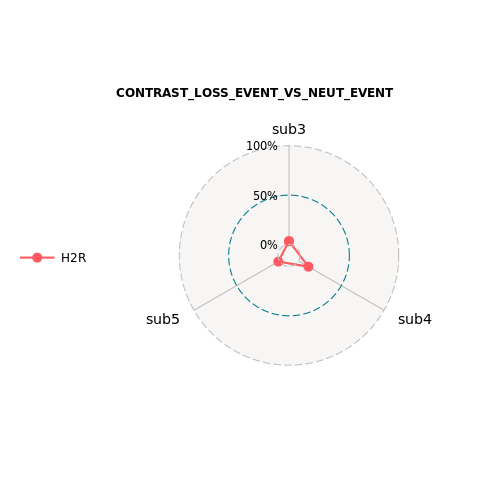

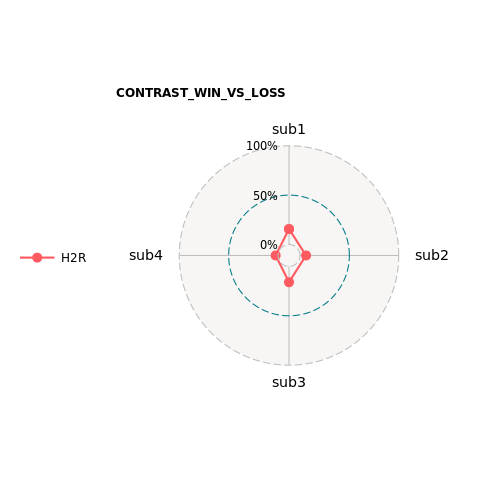

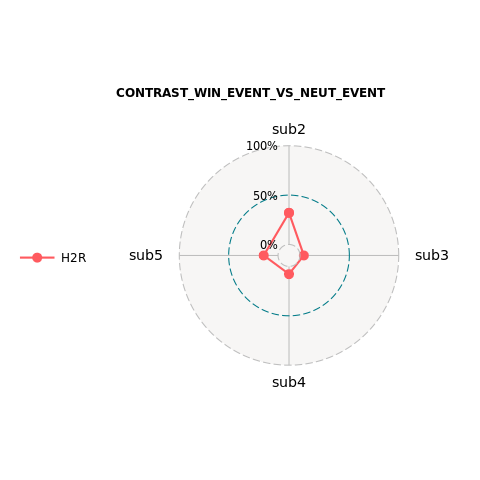

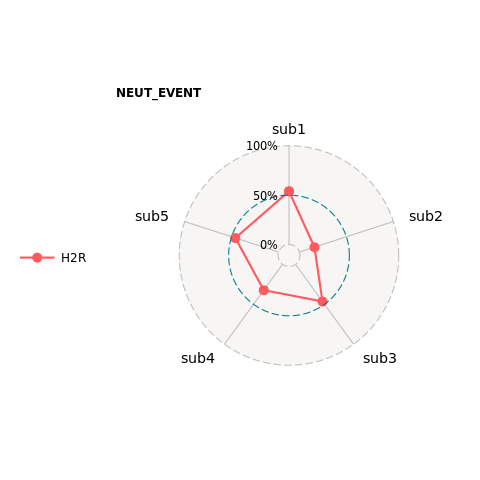

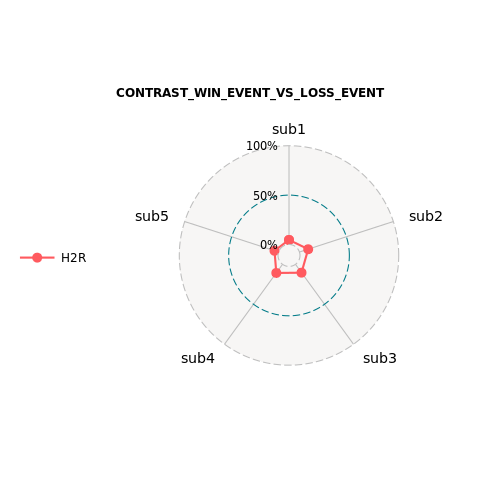

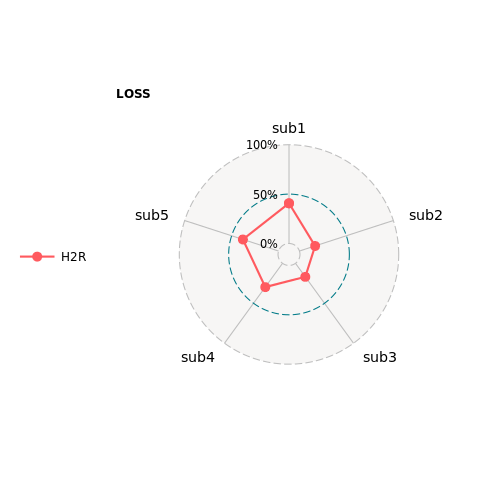

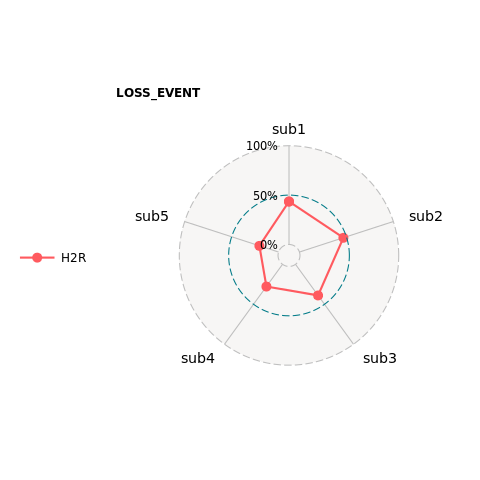

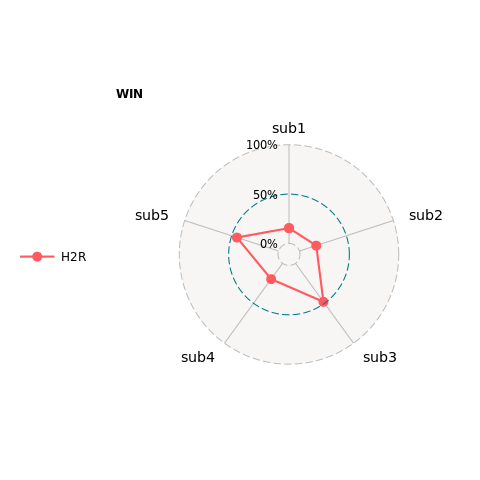

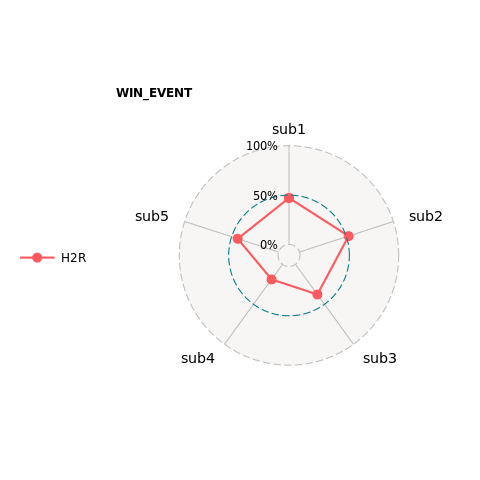

In [133]:
%%R -i out_path,solar_out,task_name,list_trial,path_root
for (ii in list_trial) {
    MyData <- read.csv(file=paste(out_path,solar_out,"/h2r_solar_",task_name,'_spm_',ii,'.csv',sep = ''))
    image_radar=ggradar(MyData, 
                        grid.min = 0,
                        grid.mid = 0.5, 
                        grid.max = 1, 
                        axis.label.size = 5, 
                        grid.label.size = 5 ,
                        legend.text.size =5,
                        group.line.width = 1,
                        group.point.size = 4)  +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' \n  ',toupper(ii),sep = ''))
    ggsave(file=paste(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_GAMBLING_19-Jun-2017/" ,ii,"_heritability.svg",sep = ''), plot=image, width=10, height=8)
    print(image_radar)
    }